In [38]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
cus_df = pd.read_csv('Mall_Customers.csv')
cus_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
cus_df.rename(columns= {'Annual Income (k$)':'Annual_Income',
                        'Spending Score (1-100)':'Spending_Score'}, inplace=True)

cus_df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

<Axes: xlabel='Annual_Income', ylabel='Density'>

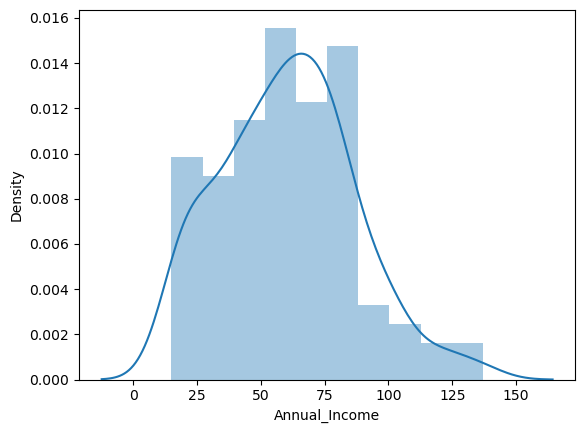

In [41]:
sns.distplot(cus_df['Annual_Income'])

In [42]:
cus_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

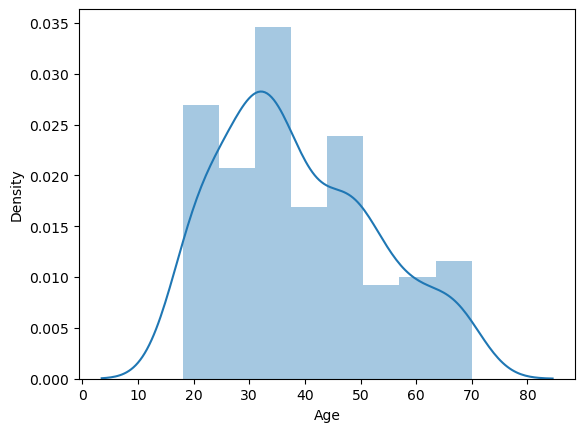

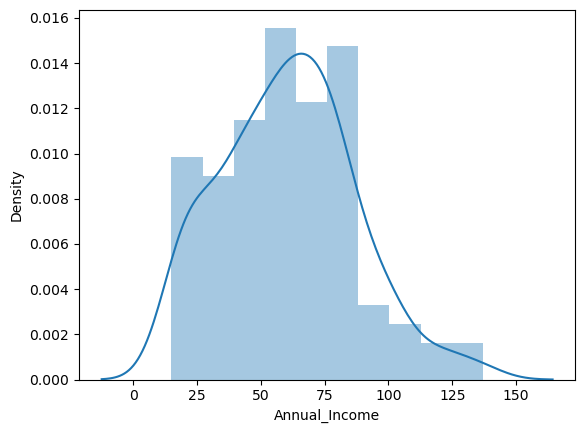

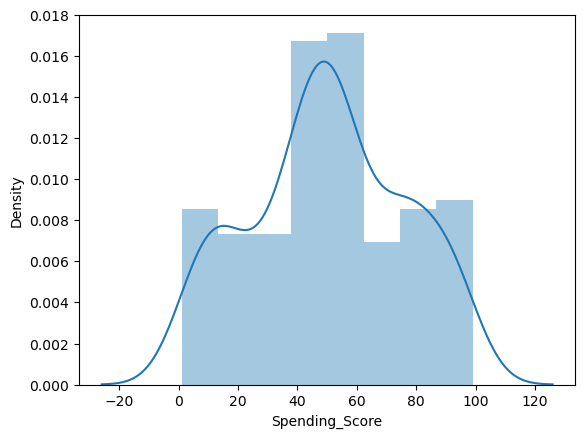

In [43]:
columns = ['Age', 'Annual_Income', 'Spending_Score']

for i in columns:
    plt.figure()
    sns.distplot(cus_df[i])
    

<Axes: xlabel='Annual_Income', ylabel='Density'>

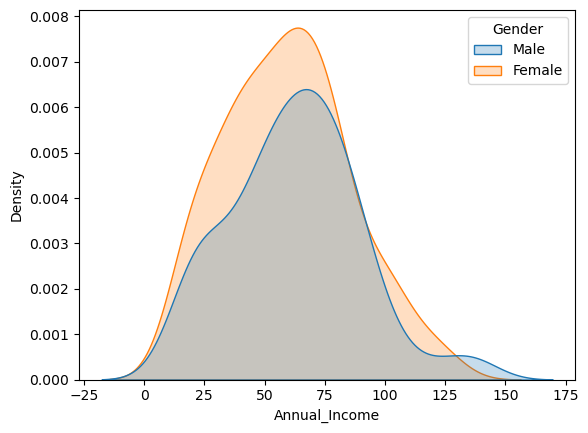

In [44]:
sns.kdeplot(data=cus_df, x='Annual_Income', hue='Gender',shade=True)

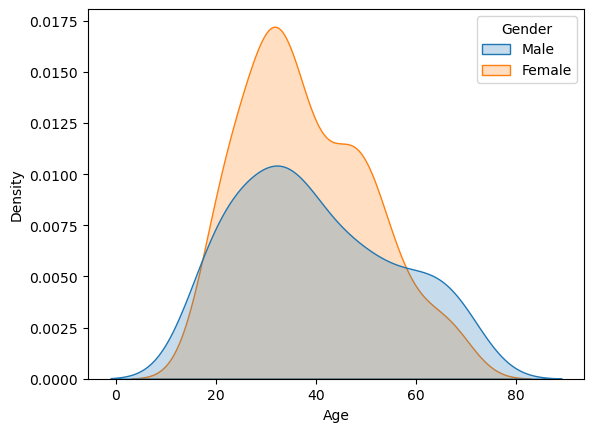

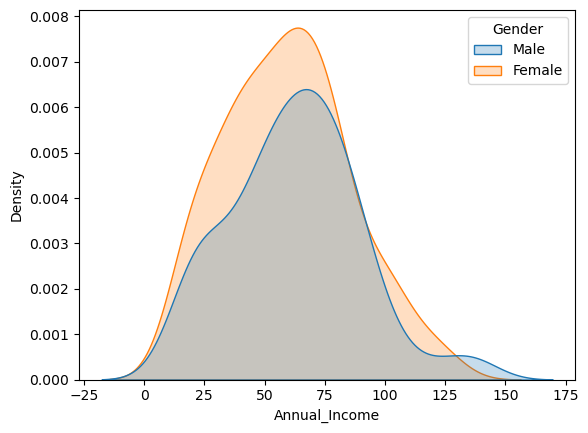

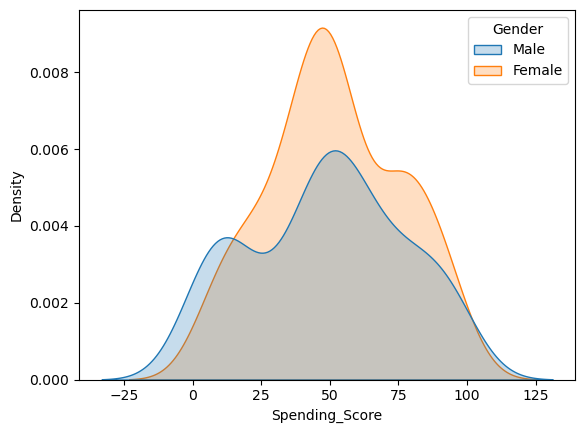

In [45]:
columns = ['Age', 'Annual_Income', 'Spending_Score']

for i in columns:
    plt.figure()
    sns.kdeplot(data=cus_df, x=cus_df[i], hue='Gender',shade=True)
    

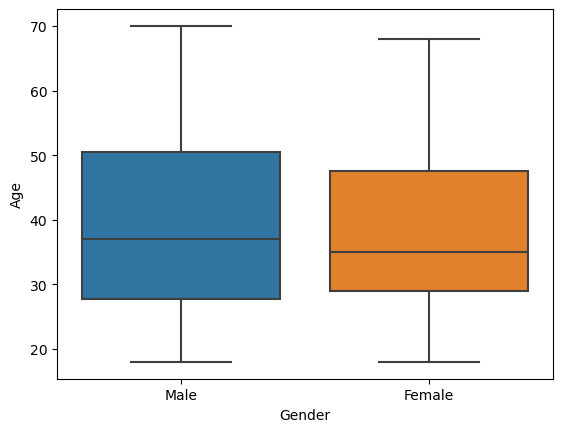

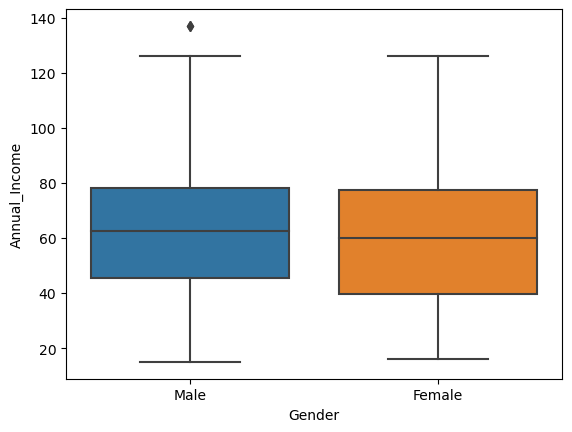

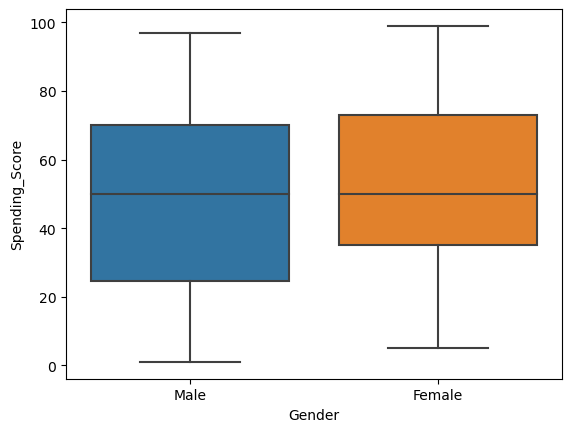

In [46]:
columns = ['Age', 'Annual_Income', 'Spending_Score']

for i in columns:
    plt.figure()
    sns.boxplot(data=cus_df, y=cus_df[i], x='Gender')
    

In [47]:
cus_df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

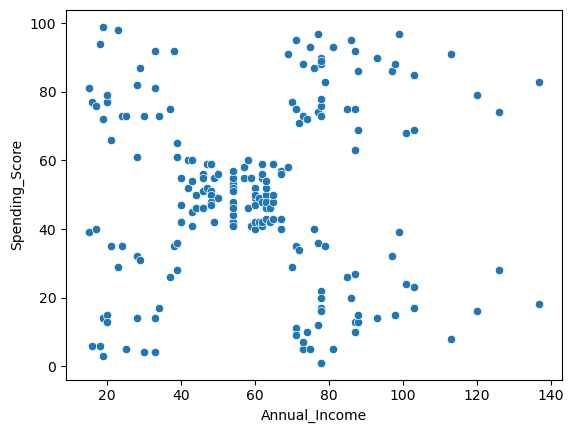

In [48]:
sns.scatterplot(data=cus_df, x='Annual_Income', y='Spending_Score')

In [49]:
cus_df = cus_df.drop('CustomerID',axis=1)

<Figure size 1200x800 with 0 Axes>

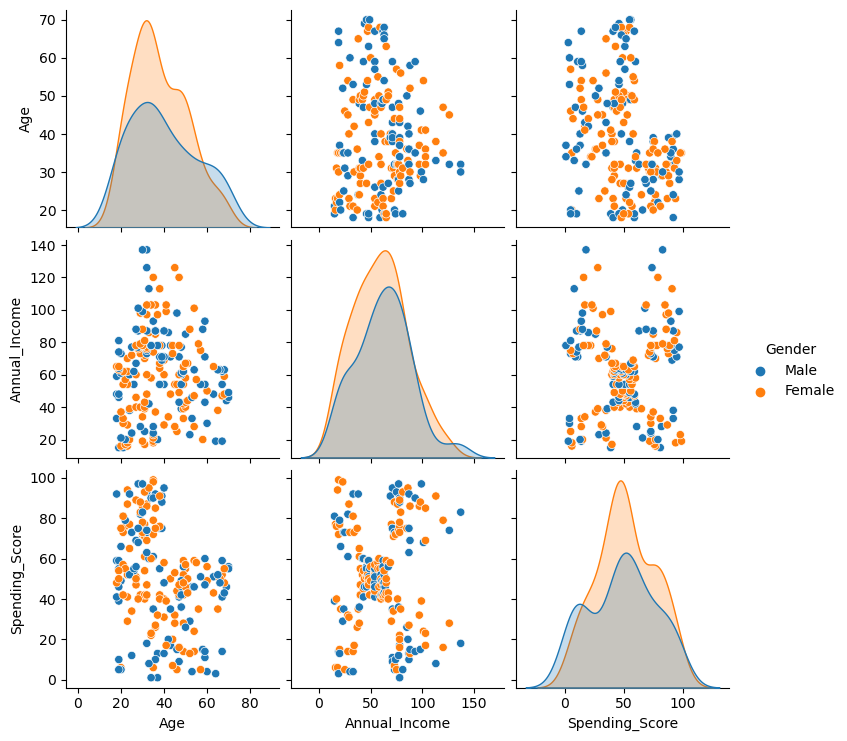

In [50]:
plt.figure(figsize=(12,8))
sns.pairplot(cus_df, hue='Gender')

In [51]:
cus_df.groupby(['Gender'])['Age','Annual_Income','Spending_Score'].mean()

,Age,Annual_Income,Spending_Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [52]:
cus_df.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<Axes: >

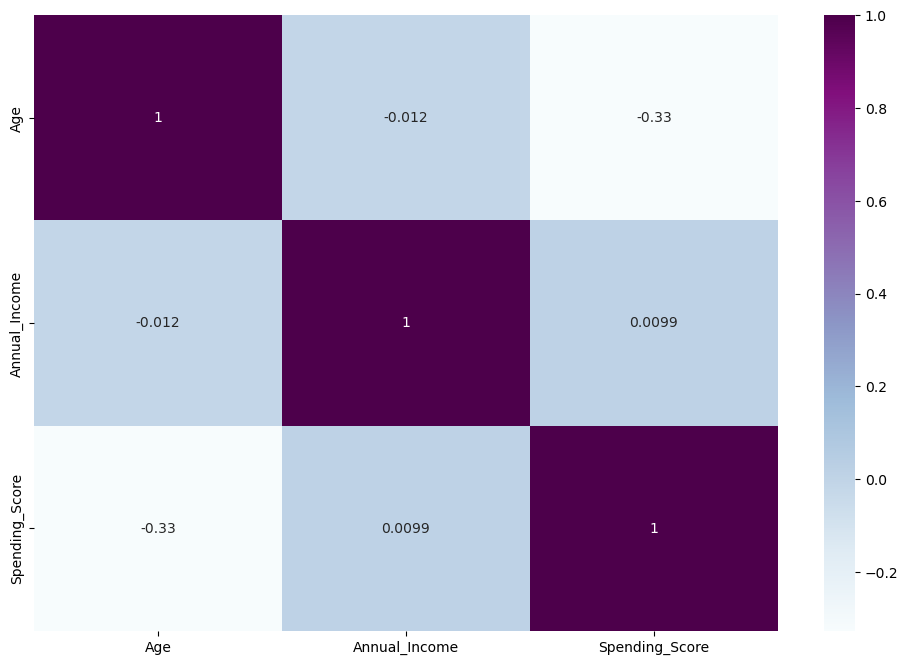

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(cus_df.corr(), annot=True, cmap='BuPu')

## Clustering - Univariate, Bivariate, Multivariate

In [54]:
from sklearn.cluster import KMeans

clustering1 = KMeans(n_clusters=3)

In [55]:
clustering1.fit(cus_df[['Annual_Income']])

KMeans(n_clusters=3)

In [56]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [58]:
cus_df['Income_Cluster'] = clustering1.labels_
cus_df.head()

,Gender,Age,Annual_Income,Spending_Score,Income_Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [59]:
clustering1.inertia_

23517.330930930937

In [60]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cus_df[['Annual_Income']])
    inertia_scores.append(kmeans.inertia_)

In [61]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3977.1301587301587,
 2822.4996947496948,
 2301.4368814192344,
 1774.5010822510822]

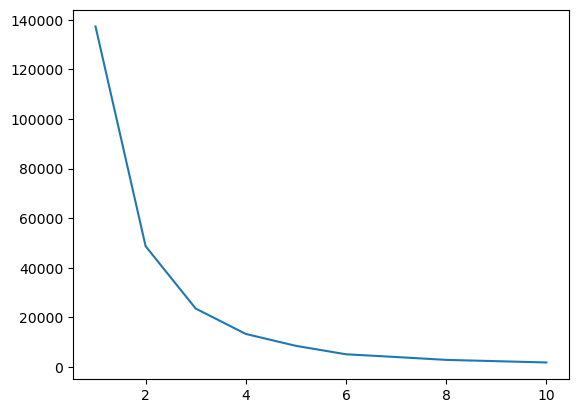

In [62]:
plt.plot(range(1,11), inertia_scores)

In [63]:
cus_df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Income_Cluster'], dtype='object')

In [64]:
cus_df.groupby('Income_Cluster')['Age','Annual_Income','Spending_Score'].mean()

,Age,Annual_Income,Spending_Score
Income_Cluster,,,
0,37.833333,99.888889,50.638889
1,38.722222,67.088889,50.000000
2,39.500000,33.486486,50.229730


## Bivariate Clustering

In [67]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(cus_df[['Annual_Income','Spending_Score']])

cus_df['Spending/Income_Cluster'] = clustering2.labels_
cus_df.head()

,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending/Income_Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,2
2,Female,20,16,6,2,3
3,Female,23,16,77,2,2
4,Female,31,17,40,2,3


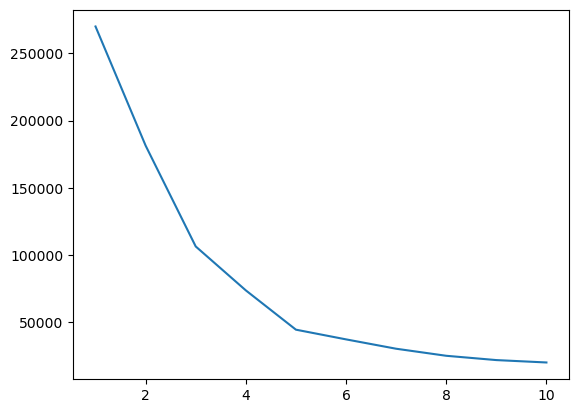

In [70]:
inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(cus_df[['Annual_Income', 'Spending_Score']])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11), inertia_scores2)

In [71]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

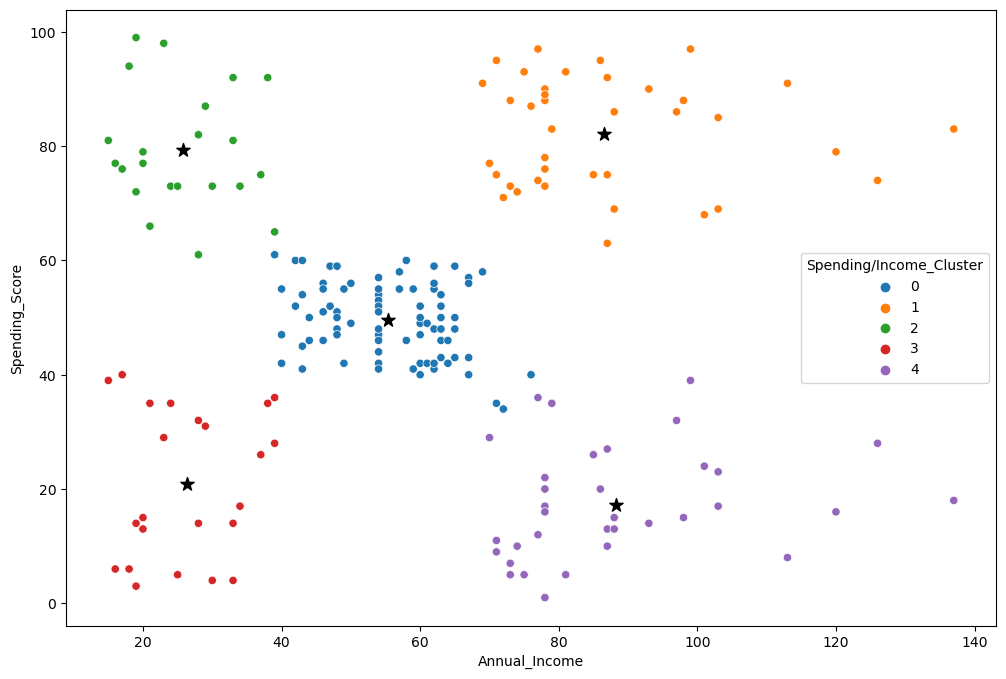

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=cus_df, x ='Annual_Income',y='Spending_Score',hue='Spending/Income_Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [75]:
pd.crosstab(cus_df['Spending/Income_Cluster'], cus_df['Gender'], normalize='index')


Gender,Female,Male
Spending/Income_Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [76]:
cus_df.groupby('Spending/Income_Cluster')['Age', 'Annual_Income',
       'Spending_Score'].mean()


,Age,Annual_Income,Spending_Score
Spending/Income_Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


## Mulivariate clustering 

In [77]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [78]:
cus_df.head()

,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending/Income_Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,2
2,Female,20,16,6,2,3
3,Female,23,16,77,2,2
4,Female,31,17,40,2,3


In [79]:
dff = pd.get_dummies(cus_df,drop_first=True)
dff.head()

,Age,Annual_Income,Spending_Score,Income_Cluster,Spending/Income_Cluster,Gender_Male
0,19,15,39,2,3,1
1,21,15,81,2,2,1
2,20,16,6,2,3,0
3,23,16,77,2,2,0
4,31,17,40,2,3,0


In [80]:
dff.columns

Index(['Age', 'Annual_Income', 'Spending_Score', 'Income_Cluster',
       'Spending/Income_Cluster', 'Gender_Male'],
      dtype='object')

In [81]:
dff = dff[['Age', 'Annual_Income', 'Spending_Score','Gender_Male']]
dff.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [82]:
dff = scaler.fit_transform(dff)

In [83]:
dff = pd.DataFrame(scaler.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


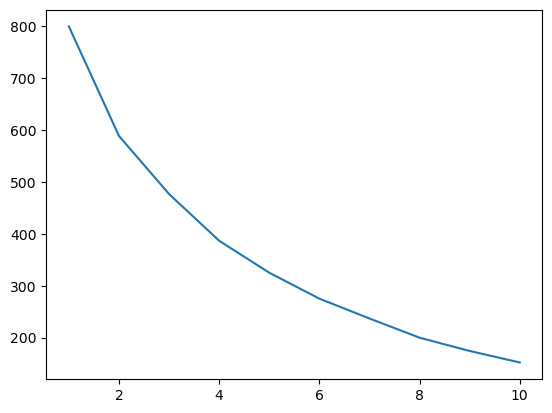

In [84]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [85]:
cus_df

,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending/Income_Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,2
2,Female,20,16,6,2,3
3,Female,23,16,77,2,2
4,Female,31,17,40,2,3
...,...,...,...,...,...,...
195,Female,35,120,79,0,1
196,Female,45,126,28,0,4
197,Male,32,126,74,0,1
198,Male,32,137,18,0,4


In [86]:
cus_df.to_csv('Clustering.csv')